# Assignment 2 - Machine Learning

We chose this and did that bla bla bla...
<br>

## Part 1 - Data Preparation

In [914]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [915]:
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1667179502&period2=1698715502&interval=1d&events=history&includeAdjustedClose=true')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
1,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
3,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
4,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200
...,...,...,...,...,...,...,...
246,2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
247,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
248,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
249,2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100


### Selecting only date and the adjusted close price for the model

In [916]:
df = df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Adj Close  251 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


### Converting dates to numbers from 0 to n

In [917]:
# Turn date into values that can be used by the model
from datetime import datetime as dt

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.toordinal) # day as integer since 1.1.1
df.sort_values(by=['Date'], inplace=True)

In [918]:
# scaling the dates
min_date = df['Date'].min()
df['Date'] = df['Date'] - min_date

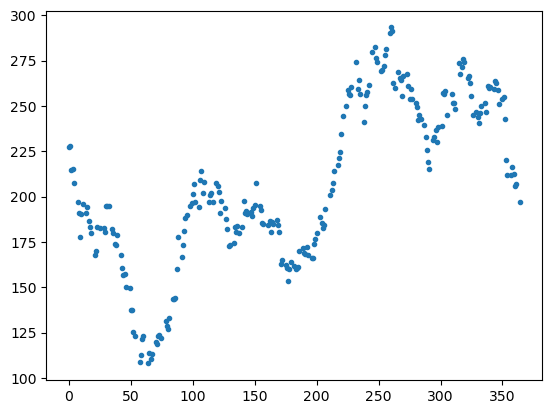

In [919]:
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
plt.scatter(df.Date, df.Adj_Close, marker='.')

## Part 2 - Split data into training and testing

In [920]:
# Reshaping the data for sklearn
X = df.Date.values.reshape(-1, 1)
y = df.Adj_Close.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

## Part 3 - Polynomial Regression

In [921]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

### Finding the optimal degree

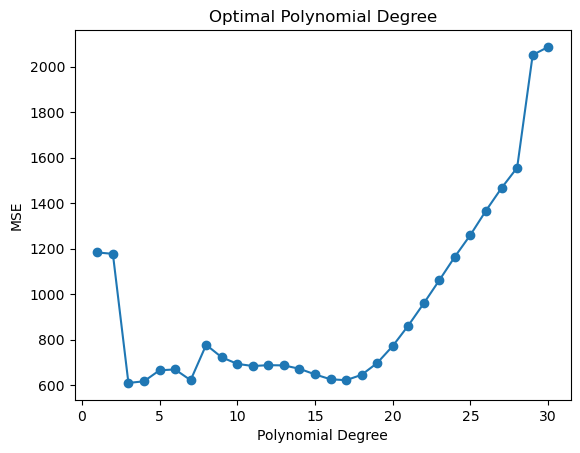

Optimal degree: 3


In [922]:
degrees = range(1, 31)
mse_values = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)

    # Transform input data
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Evaluate model
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot MSE values for each degree
plt.plot(degrees, mse_values, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('Optimal Polynomial Degree')
plt.show()

# Find the degree with the minimum MSE
optimal_degree = degrees[np.argmin(mse_values)]
print(f"Optimal degree:", optimal_degree)

### Create model

In [923]:
# Transform input data
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [924]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

### Evaluate model

In [925]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

2086.1422884031313


In [926]:
# R2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.2180684118559546


### Prediction

In [927]:
y_pred = model.predict(X_test_poly)

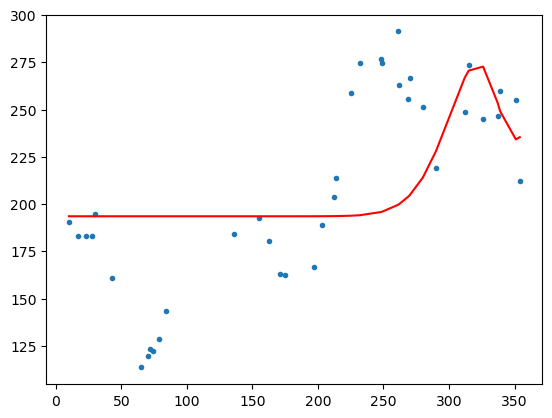

In [928]:
# Plot
sorted_indices = X_test.ravel().argsort()
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X_test, y_test, marker='.')
plt.plot(X_test_sorted, y_pred_sorted, color='red')
plt.show()

In [929]:
# Turn date into values that can be used by the model
from datetime import datetime as dt

# Get date for tomorrow
tomorrow = dt.today().toordinal() - min_date + 1

In [930]:
# Predict
y_pred = model.predict(poly.transform([[tomorrow]]))
print(y_pred)

[[97.36747372]]


## Part 4 - Trying with another model

### Re-reading the data using datetime for this version

In [931]:
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1667179502&period2=1698715502&interval=1d&events=history&includeAdjustedClose=true')

df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
1,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
3,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
4,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200
...,...,...,...,...,...,...,...
246,2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
247,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
248,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
249,2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100


### Plotting the data

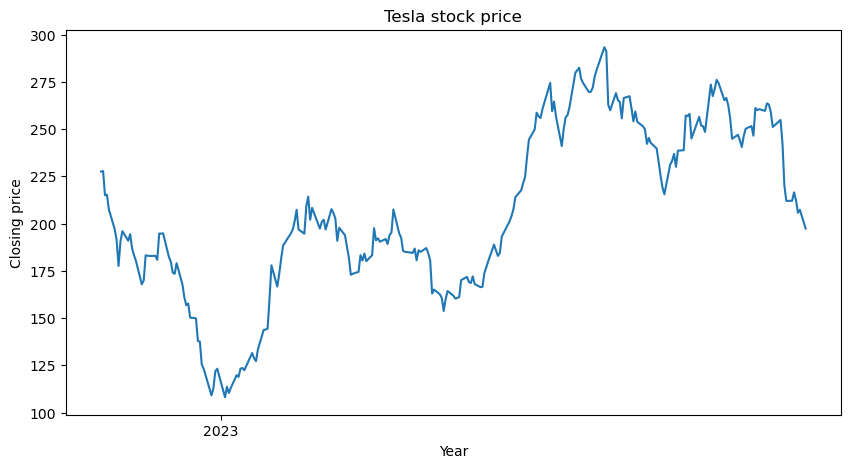

In [932]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Tesla stock price')
plt.xlabel('Year')
plt.ylabel('Closing price')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

## Part 5 - Preparing the data

In [933]:
# We create a new dataframe with only the Date and Close columns
df = df[['Date', 'Close']].copy()

df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   Close   251 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


,Date,Close
246,2023-10-24,216.520004
247,2023-10-25,212.419998
248,2023-10-26,205.759995
249,2023-10-27,207.300003
250,2023-10-30,197.360001


### Splitting the data

In [934]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the dataframe into features X and target Y
X = df.drop('Close', axis=1)
Y = df['Close']

# We also split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1)

# We create a GradientBoostingRegressor model with default parameters
model = GradientBoostingRegressor()

# We fit the model to the training data
model.fit(x_train, y_train)

GradientBoostingRegressor()

### Evaluating the model

In [935]:
# We calculate the mean squared error of the model
mse = mean_squared_error(y_test, model.predict(x_test))
print('The mean squared error is: {:.4f}'.format(mse))

The mean squared error is: 45.5422


## Part 6 - Hyperparameter tuning

In [936]:
from sklearn.model_selection import RandomizedSearchCV


# This function will train a model with different parameters, return the best model and print the best parameters
def get_best_estimator(model, iterations=250):
    # We create a dictionary with the parameters we want to test
    distrubutions = {
        'n_estimators': [100, 250, 500, 750, 1000],
        'max_depth': [2, 3, 4, 5, 6],
        'min_samples_split': [2, 3, 4, 5],
        'learning_rate': [0.001, 0.01, 0.1, 1],
        'criterion': ['friedman_mse', 'mse'],
        'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    }

    # We create a RandomizedSearchCV object
    search = RandomizedSearchCV(
        model,
        param_distributions=distrubutions,
        n_iter=iterations,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        cv=5,
    )

    # We fit the model to the training data
    search.fit(x_train, y_train)

    # We get the best model
    best_estimator = search.best_estimator_

    # We get the best parameters
    best_params = search.best_params_

    # We print the best parameters
    print('The best model has the following parameters:')
    print(best_params)

    # Return the best model and best parameters from the RandomizedSearchCV
    return best_estimator

### Training

In [937]:
# These params are the result from prevoiusly running get_best_estimator function
# We can now use these params to create a new model without having to rerun the function
params = {'n_estimators': 500,
          'min_samples_split': 2,
          'max_depth': 3,
          'loss': 'squared_error',
          'learning_rate': 0.1}

# We create a new GradientBoostingRegressor model with default parameters
model_tuned = GradientBoostingRegressor(**params)

# We fit the model to the training data
model_tuned.fit(x_train, y_train)

# If you want to run the get_best_estimator function you can uncomment the line below.
# Change the number of iterations to a higher number if you want to test more parameters
# model_new = get_best_estimator(model, 250)

GradientBoostingRegressor(n_estimators=500)

### New round of evaluation

In [938]:
mse_new = mean_squared_error(y_test, model_tuned.predict(x_test))
print('The mean squared error (MSE) on test set: {:.4f}'.format(mse_new))

The mean squared error (MSE) on test set: 51.8609


In [939]:
# Lets look at the improvement in MSE compared to the default model
print('The mean squared error (MSE) improvement: {:.2f}%'.format(
    (mse - mse_new) / mse * 100))

The mean squared error (MSE) improvement: -13.87%


## Plotting the predictions

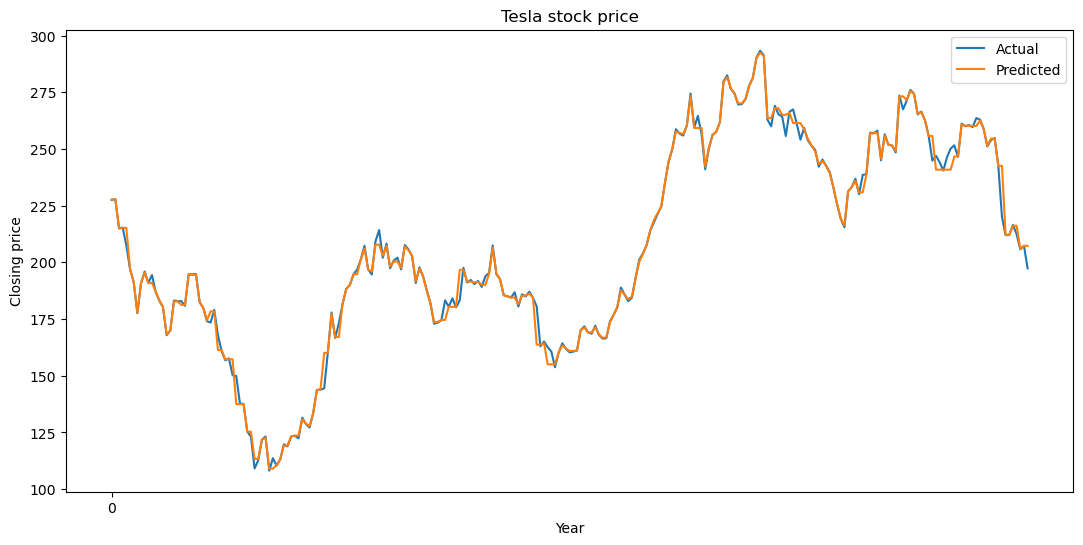

In [940]:
# We create a plot showing the actual closing price and the predicted closing price
prediction = model_tuned.predict(X)

plt.figure(figsize=(13, 6))
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(df.index, prediction, label='Predicted')
plt.title('Tesla stock price')
plt.xlabel('Year')
plt.ylabel('Closing price')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.legend()
plt.show()

## Testing future days

In [941]:
# Function to predict the closing price of Tesla stock for a given date
def predict_closing_price(model, date):
    # We create a dataframe with the given date
    df_test = pd.DataFrame({'Date': [date]})

    # We create a new dataframe with only the Date column
    X = df_test[['Date']].copy()

    # We predict the closing price of the given date
    predicted_price = model.predict(X)[0]

    # We print the predicted price
    print('Using', model, 'the predicted closing price of Tesla stock for {} is: ${:.2f}'.format(
        date.strftime('%Y-%m-%d'), predicted_price))

In [942]:
# Test the function with yesterdays date to see if it works
predict_closing_price(model, dt.today() - pd.Timedelta(days=1))
predict_closing_price(model_tuned, dt.today() - pd.Timedelta(days=1))

# Actual price of last item in dataframe
print('The actual closing price of Tesla stock for {} is: ${:.2f}'.format(
    df['Date'].iloc[-1].strftime('%Y-%m-%d'), df['Close'].iloc[-1]))

Using GradientBoostingRegressor() the predicted closing price of Tesla stock for 2023-10-30 is: $208.55
Using GradientBoostingRegressor(n_estimators=500) the predicted closing price of Tesla stock for 2023-10-30 is: $207.28
The actual closing price of Tesla stock for 2023-10-30 is: $197.36
